In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("Fremont_Bridge_Bicycle_Counter.csv", index_col= "Date", parse_dates= True)
df.head()
df.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [20]:
df.columns = ["Total", "East", "West"]

df.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [21]:
df.isnull().sum()

Total    10
East     10
West     10
dtype: int64

In [22]:
df.dropna(how= "any", axis= 0, inplace=True)

In [23]:
df.isnull().sum()

Total    0
East     0
West     0
dtype: int64

In [24]:
df.describe()

,Total,East,West
count,64934.000000,64934.000000,64934.000000
mean,113.805033,51.976191,61.828842
std,145.235402,67.013247,90.605138
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,70.000000,74.000000
max,1097.000000,698.000000,850.000000


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

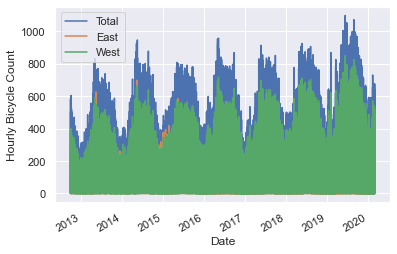

In [27]:
sns.set()
df.plot()
plt.ylabel("Hourly Bicycle Count")
plt.show()

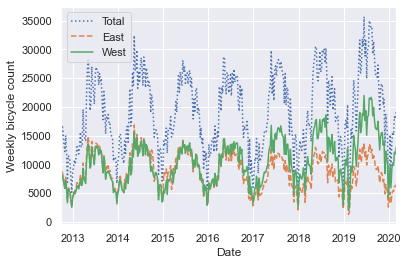

In [29]:
weekly = df.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel("Weekly bicycle count")
plt.show()

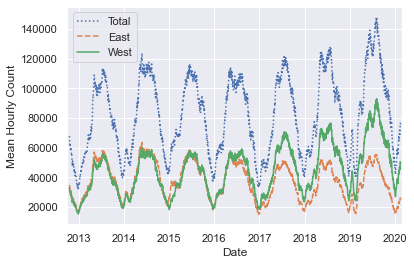

In [30]:
daily = df.resample("D").sum()
daily.rolling(30, center=True).sum().plot(style=[":", '--', "-"])
plt.ylabel("Mean Hourly Count")
plt.show()

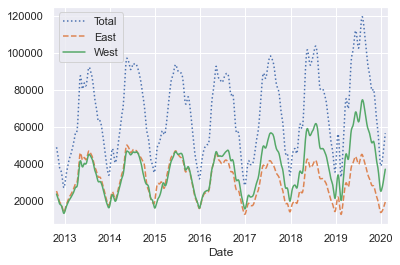

In [32]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[":", "--", "-"])
plt.show()

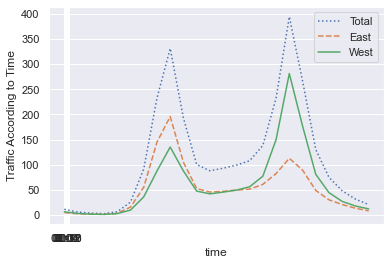

In [33]:
import numpy as np
by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style =[":", "--", "-"])
plt.ylabel("Traffic According to Time")
plt.show()